# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f'http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}' #forecast?id=524901&

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Variable for returned unit of measurement
unit ='metric'

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}&units={unit}&q={city}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))


    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'timezone', 'id', 'name', 'cod'])
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | puerto deseado
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | alice springs
Processing Record 5 of Set 1 | isafjordur
Processing Record 6 of Set 1 | bilibino
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | nar'yan-mar
Processing Record 9 of Set 1 | aasiaat
Processing Record 10 of Set 1 | bikenibeu village
Processing Record 11 of Set 1 | saldanha
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | hasaki
Processing Record 14 of Set 1 | tiksi
Processing Record 15 of Set 1 | nagqu
Processing Record 16 of Set 1 | anibare
City not found. Skipping...
Processing Record 17 of Set 1 | grytviken
Processing Record 18 of Set 1 | waitangi
Processing Record 19 of Set 1 | blackmans bay
Processing Record 20 of Set 1 | ribeira grande
Processing Record 21 of Set 1 | albany
Processing Record 22

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,4.81,70,40,1.03,AR,1691636488
1,puerto deseado,-47.7503,-65.8938,9.59,77,100,4.14,AR,1691636679
2,yellowknife,62.4560,-114.3525,21.29,43,75,3.60,CA,1691636420
3,alice springs,-23.7000,133.8833,24.75,19,1,6.17,AU,1691636472
4,isafjordur,66.0755,-23.1240,7.56,76,33,7.34,IS,1691636446


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,4.81,70,40,1.03,AR,1691636488
1,puerto deseado,-47.7503,-65.8938,9.59,77,100,4.14,AR,1691636679
2,yellowknife,62.4560,-114.3525,21.29,43,75,3.60,CA,1691636420
3,alice springs,-23.7000,133.8833,24.75,19,1,6.17,AU,1691636472
4,isafjordur,66.0755,-23.1240,7.56,76,33,7.34,IS,1691636446


In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,4.81,70,40,1.03,AR,1691636488
1,puerto deseado,-47.7503,-65.8938,9.59,77,100,4.14,AR,1691636679
2,yellowknife,62.4560,-114.3525,21.29,43,75,3.60,CA,1691636420
3,alice springs,-23.7000,133.8833,24.75,19,1,6.17,AU,1691636472
4,isafjordur,66.0755,-23.1240,7.56,76,33,7.34,IS,1691636446


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

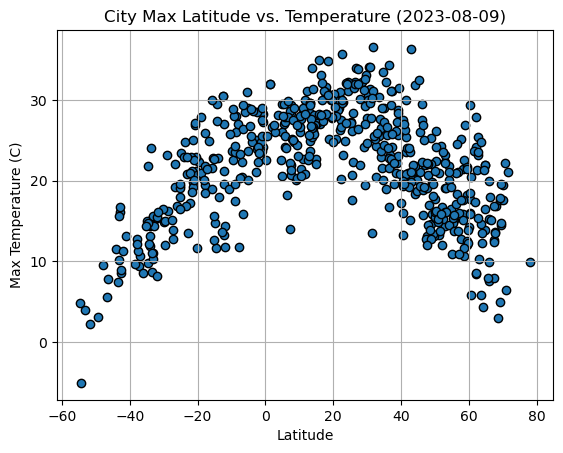

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'],edgecolors='black')
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid()
plt.title(f'City Max Latitude vs. Temperature ({time.strftime("%Y-%m-%d")})') # dynamic changing title for current date

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

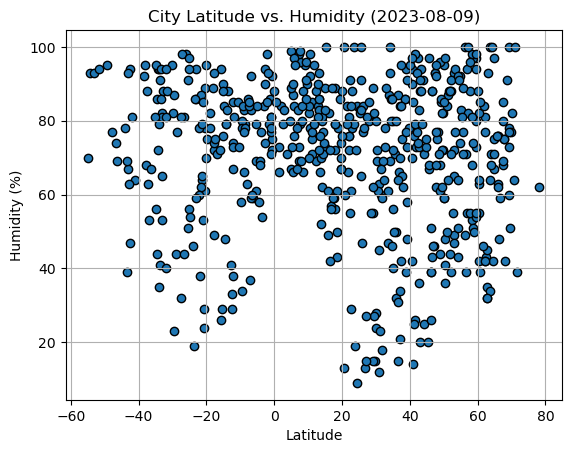

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'],edgecolors='black')
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.title(f'City Latitude vs. Humidity ({time.strftime("%Y-%m-%d")})') # dynamic changing title for current date

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

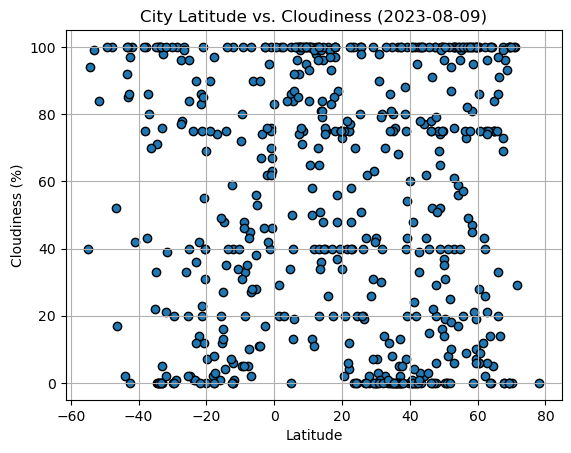

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'],edgecolors='black')
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.title(f'City Latitude vs. Cloudiness ({time.strftime("%Y-%m-%d")})') # dynamic changing title for current date

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

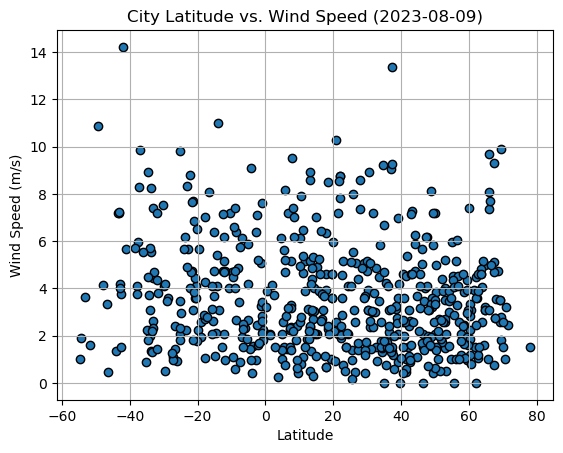

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'],edgecolors='black')
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()
plt.title(f'City Latitude vs. Wind Speed ({time.strftime("%Y-%m-%d")})') # dynamic changing title for current date

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def linplot(x_label,y_label,df,loc = 'upper_right'):
    '''Plots regression line and data points for specified columns of a dataframe'''
    x = df[x_label]
    y = df[y_label]
    m, b, r, p, se = linregress(x, y)
    regress_vals = x * m + b
    line_eq = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
    print(f"The r-squared is: {r**2}")
    if loc == 'upper_left':
        xy = (0.05,0.95)
    elif loc == 'lower_right':
        xy = (0.95,0.05)
    elif loc == 'lower_left':
        xy = (0.05,0.05)
    else:
        xy = (0.95,0.95)
    plt.scatter(x,y)
    plt.plot(x,regress_vals,"r-")
    plt.annotate(line_eq,xy = xy,xycoords='axes fraction',fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.tight_layout()
    plt.show()


In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,yellowknife,62.4560,-114.3525,21.29,43,75,3.60,CA,1691636420
4,isafjordur,66.0755,-23.1240,7.56,76,33,7.34,IS,1691636446
5,bilibino,68.0546,166.4372,16.84,42,96,3.57,RU,1691636679
7,nar'yan-mar,67.6713,53.0870,13.61,75,0,2.76,RU,1691636680
8,aasiaat,68.7098,-52.8699,3.04,91,93,4.75,GL,1691636680


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,4.81,70,40,1.03,AR,1691636488
1,puerto deseado,-47.7503,-65.8938,9.59,77,100,4.14,AR,1691636679
3,alice springs,-23.7000,133.8833,24.75,19,1,6.17,AU,1691636472
6,port-aux-francais,-49.3500,70.2167,3.11,95,100,10.89,TF,1691636419
10,saldanha,-33.0117,17.9442,11.03,65,0,2.63,ZA,1691636520


###  Temperature vs. Latitude Linear Regression Plot

In [16]:
# Define a function to create Linear Regression plots
def weather_linplot(x_label,y_label,df,loc = 'upper_right'):
    '''Plots regression line and data points for specified columns of a dataframe'''
    x = df[x_label]
    y = df[y_label]
    m, b, r, p, se = linregress(x, y)
    regress_vals = x * m + b
    line_eq = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
    print(f"The r-value is: {(r)}")
    if loc == 'upper_left':
        xy = (0.05,0.9)
    elif loc == 'lower_right':
        xy = (0.55,0.1)
    elif loc == 'lower_left':
        xy = (0.05,0.1)
    else:
        xy = (0.55,0.9)
    plt.scatter(x,y)
    plt.plot(x,regress_vals,"r-")
    plt.annotate(line_eq,xy = xy,xycoords='axes fraction',fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

# rename columns to fix axis label
southern_hemi_df = southern_hemi_df.rename(columns = {'Lat':'Latitude','Lng':'Longitude'})
northern_hemi_df = northern_hemi_df.rename(columns = {'Lat':'Latitude','Lng':'Longitude'})

The r-value is: -0.649888723401974


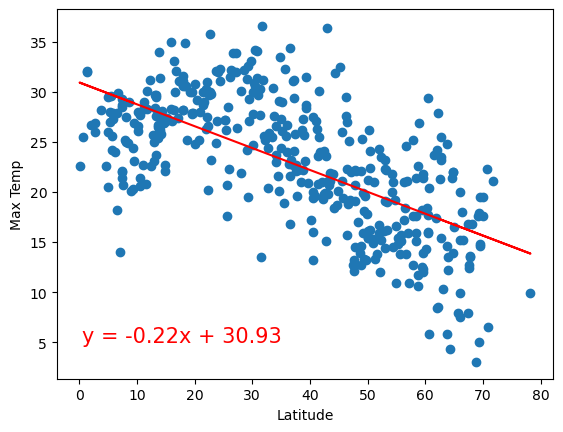

In [17]:
# Linear regression on Northern Hemisphere
weather_linplot('Latitude','Max Temp',northern_hemi_df,loc = 'lower_left')

The r-value is: 0.7860413950854184


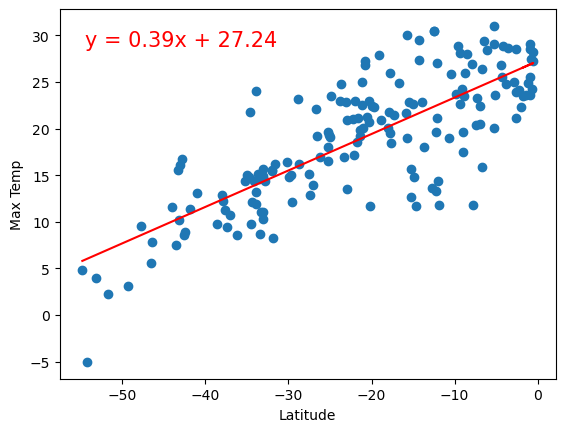

In [18]:
# Linear regression on Southern Hemisphere
weather_linplot('Latitude','Max Temp',southern_hemi_df,loc = 'upper_left')

**Discussion about the linear relationship:** 
- There is a strong positive correlation between the latitude in the southern hemisphere (negative) and the max temperature. There is also a moderate negative correlation between latitudes in the northern hemisphere (positive) and the max temperature. Taken together, both of these findings indicate that locations with latitudes closer to zero (the equator) experience higher max temperatures.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.1312348628992279


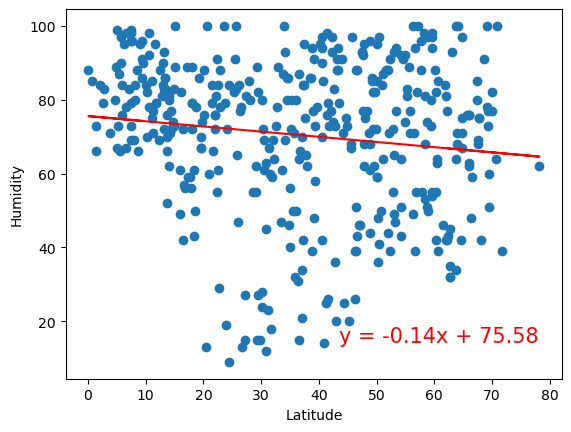

In [19]:
# Northern Hemisphere
weather_linplot('Latitude','Humidity',northern_hemi_df,loc = 'lower_right')

The r-value is: -0.021582836901796087


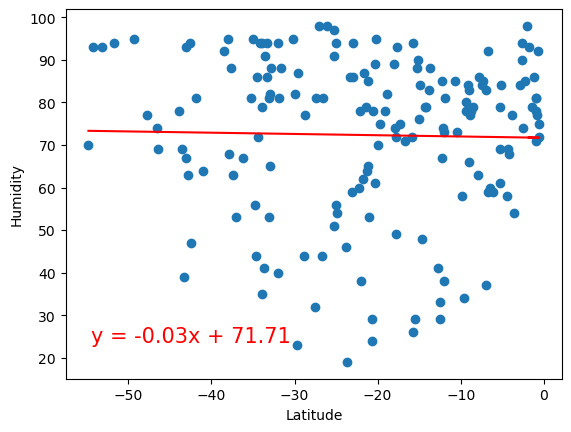

In [20]:
# Southern Hemisphere
weather_linplot('Latitude','Humidity',southern_hemi_df,loc = 'lower_left')

**Discussion about the linear relationship:** 
- In both the southern and northern hemisphere there are poor correlations between latitude and humidity. THis would mean there is no relation between the humidity of a region and its distance from the equator. While some areas near the equator may experience high amounts of moisture, some may also experience very little moisture.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.1301044089400918


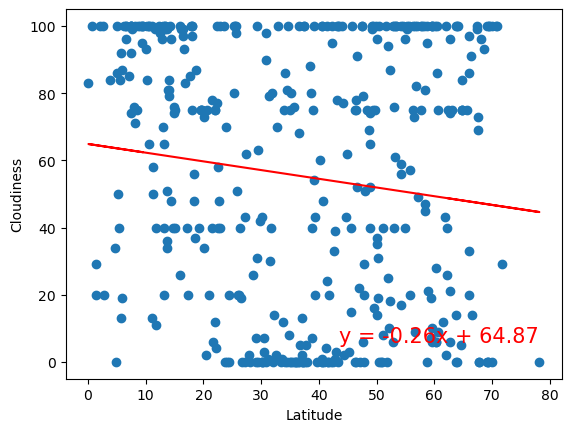

In [21]:
# Northern Hemisphere
weather_linplot('Latitude','Cloudiness',northern_hemi_df,loc = 'lower_right')

The r-value is: -0.14356263316727602


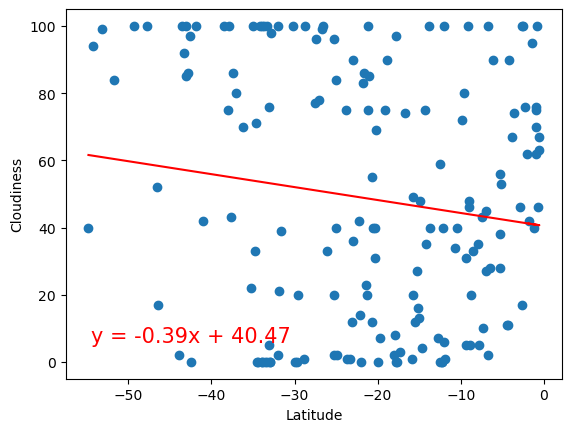

In [22]:
# Southern Hemisphere
weather_linplot('Latitude','Cloudiness',southern_hemi_df,loc = 'lower_left')

**Discussion about the linear relationship:** In both the southern and northern hemispheres there is a poor negative correlation between latitiude and cloudiness. This would indicate that there is a very little relationship, if any, between the cloudiness of a location and its latitude (distance from the equator). While both southern and northern hemisphere correlations being negative would indicate that cloudiness decreases as the observed regions move south, the poor correlation questions the validity of the implication.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.05215438730945405


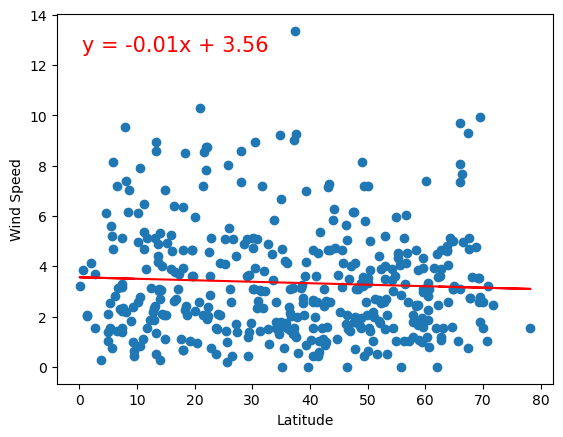

In [23]:
# Northern Hemisphere
weather_linplot('Latitude','Wind Speed',northern_hemi_df,loc = 'upper_left')

The r-value is: -0.11662495518861037


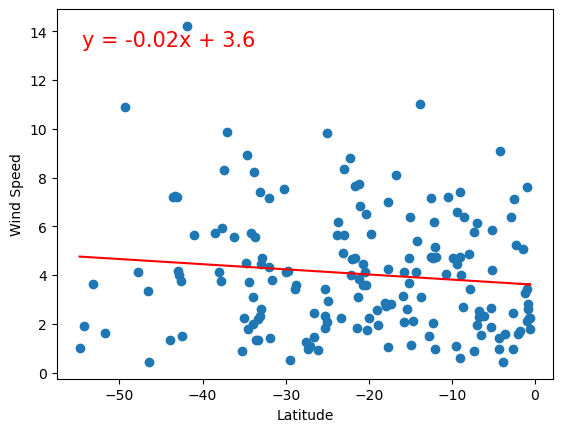

In [24]:
# Southern Hemisphere
weather_linplot('Latitude','Wind Speed',southern_hemi_df,loc = 'upper_left')

**Discussion about the linear relationship:** In both the southern and northern hemispheres there is a poor negative correlation between latitiude and wind speed. This would indicate that there is a very little relationship, if any, between the wind speeds of a location and its latitude (distance from the equator). In other words, wind speed can vary independently of its distance from the equator.